In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Employeeturnover.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [6]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [7]:
df['sales'] = df['sales'].replace('RandD', 'R&D')
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
R&D             787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [8]:
df = df.rename(columns = {'sales':'department'})
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [11]:
df['salary']=df['salary'].replace('low', '0')
df['salary']=df['salary'].replace('medium', '1')
df['salary']=df['salary'].replace('high', '2')
df['salary'].dtypes

dtype('O')

In [12]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [13]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [25]:
df.groupby('left', as_index=False).mean()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [33]:
df.groupby('department', as_index=False).mean()

,department,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
1,R&D,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
2,accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
3,hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
4,management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
5,marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
6,product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
7,sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
8,support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973
9,technical,0.607897,0.721099,3.877941,202.497426,3.411397,0.140074,0.256250,0.010294


In [35]:
df.groupby(['salary']).mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
0,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
1,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079
2,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205


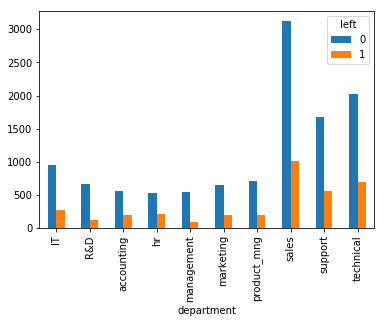

In [36]:
pd.crosstab(df['department'], df['left']).plot(kind='bar')

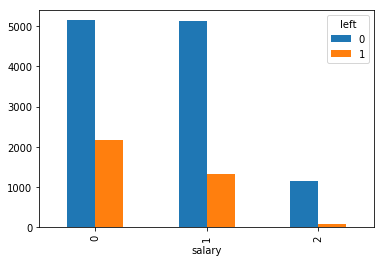

In [37]:
pd.crosstab(df['salary'], df['left']).plot(kind='bar')

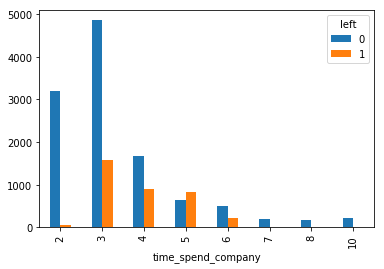

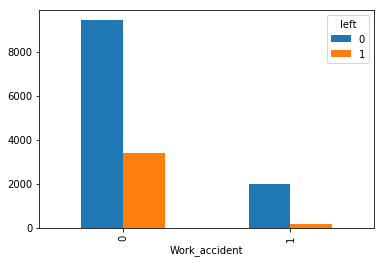

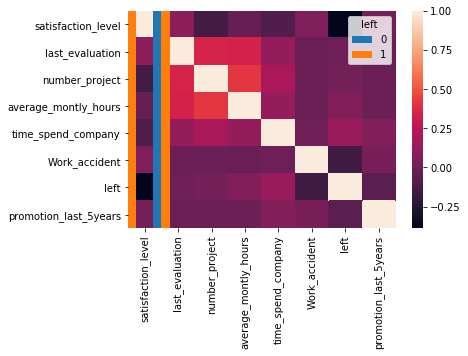

In [46]:
pd.crosstab(df['time_spend_company'], df['left']).plot(kind='bar')
pd.crosstab(df['Work_accident'], df['left']).plot(kind='bar')
pd.crosstab(df['promotion_last_5years'], df['left']).plot(kind='bar')
sns.heatmap(df.corr())

In [64]:
df.shape

(14999, 10)

In [107]:
from sklearn.metrics import mean_squared_error
X=[df['satisfaction_level'], df['last_evaluation'], df['number_project'], df['average_montly_hours'], df['time_spend_company'], df['Work_accident'] , df['promotion_last_5years']]
y=df['left']
X=np.array(X)
X=X.transpose()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model_fit = model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('XgBoostClassifier Accuracy:', accuracy_score(y_pred, y_test))
print('XgBoostClassifier RMSE:', mean_squared_error(y_pred, y_test))

XgBoostClassifier Accuracy: 0.9744
XgBoostClassifier RMSE: 0.0256


In [82]:
!pip install scikit-spark
!pip install pyspark
from skspark.model_selection import GridSearchCV

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestClassifier

In [110]:
lr=LogisticRegression()
lr_lass = Lasso()
lr_rid = Ridge()
lr_en = ElasticNet()
rf=RandomForestClassifier()
lr.fit(X_train, y_train)
lr_lass.fit(X_train, y_train)
lr_rid.fit(X_train, y_train)
lr_en.fit(X_train, y_train)
rf.fit(X_train, y_train)
y_pred=lr.predict(X_test)
y_lass_pred=lr_lass.predict(X_test)
y_rid_pred=lr_rid.predict(X_test)
y_en_pred=lr_en.predict(X_test)
rf_pred=rf.predict(X_test)
print('Logistic Regression RMSE:', mean_squared_error(y_test,y_pred))
print('Lasso Logistic Regression RMSE:', mean_squared_error(y_test,y_lass_pred))
print('Ridge Logistic Regression RMSE:', mean_squared_error(y_test,y_rid_pred))
print('Elastic Net Logistic Regression RMSE:', mean_squared_error(y_test,y_en_pred))
print('Random Forest Classifier RMSE:', mean_squared_error(y_test,rf_pred))
print('Random Forest Classifier Accuracy:', accuracy_score(y_test,rf_pred))

C:\Users\Harsh\.LSC\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Harsh\.LSC\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Logistic Regression RMSE: 0.24
Lasso Logistic Regression RMSE: 0.18542575168750738
Ridge Logistic Regression RMSE: 0.1492695827479774
Elastic Net Logistic Regression RMSE: 0.18509783621152
Random Forest Classifier RMSE: 0.014133333333333333
Random Forest Classifier Accuracy: 0.9858666666666667


*Random Forest Classifier outperforms regularized logistic regression as well as XGBoost. We can however, further compare XGBoost and Random Forest after tuning their parameters using GridSearchCV.*